<meta name="keywords" content="Demo for Inline Plotting with Jupyter-Scala Jupyter Scala inline plot plotting example demo">
# Demo for Inline Plotting with Jupyter-Scala

Jupyter-Scala provides a productive and interactive environment for Scala.
The default for Jupyter-Scala makes plots appear outside the output.
This demo shows how by creating an `inlineplot` function, plots in 
breeze-viz can be directed to output.

### First we load the libraries necessary

In [19]:
load.ivy("org.scalanlp" %% "breeze" % "0.12")
load.ivy("org.scalanlp" %% "breeze-natives" % "0.12")
load.ivy("org.scalanlp" %% "breeze-viz" % "0.12")
load.ivy("commons-codec" %% "commons-codec" % "1.9")
// don't mind these comments...
// jvmr.jar can be found at https://cran.r-project.org/src/contrib/Archive/jvmr/
//load.jar("/home/luiarthur/Libs/scala-2.11.8/lib/jvmr_2.11-2.11.2.1.jar")

:: problems summary ::
:::: WARNINGS
	Unable to reparse com.github.alexarchambault.jupyter#jupyter-scala-api_2.11.6;0.2.0-SNAPSHOT from sonatype-snapshots, using Thu Dec 24 06:50:58 PST 2015

	Choosing sonatype-snapshots for com.github.alexarchambault.jupyter#jupyter-scala-api_2.11.6;0.2.0-SNAPSHOT

	Unable to reparse com.github.alexarchambault#ammonite-api_2.11.6;0.3.1-SNAPSHOT from sonatype-snapshots, using Wed Oct 21 02:43:36 PDT 2015

	Choosing sonatype-snapshots for com.github.alexarchambault#ammonite-api_2.11.6;0.3.1-SNAPSHOT

	Unable to reparse com.github.alexarchambault.jupyter#jupyter-api_2.11;0.2.0-SNAPSHOT from sonatype-snapshots, using Wed Oct 21 08:03:52 PDT 2015

	Choosing sonatype-snapshots for com.github.alexarchambault.jupyter#jupyter-api_2.11;0.2.0-SNAPSHOT

		module not found: org.apache.commons#commons-io_2.11;1.3.2

	==== local: tried

	  /home/luiarthur/.ivy2/local/org.apache.commons/commons-io_2.11/1.3.2/ivys/ivy.xml

	==== public: tried

	  https://repo1.maven.o

### Then we need to import the libraries

In [14]:
import breeze.stats.distributions._
import breeze.linalg._
import breeze.plot._
// don't mind this comment
//import org.ddahl.jvmr.RInScala // this works

import breeze.stats.distributions._
import breeze.linalg._
import breeze.plot._

### Now we create our   `inlineplot`    function for breeze

In [21]:
def inlineplot(P: Plot, imgSz: (Int,Int) = (600,600) )  = {
    import org.jfree.chart.encoders.EncoderUtil
    import org.apache.commons.codec.binary.Base64
    val img = P.chart.createBufferedImage(imgSz._2,imgSz._1,java.awt.image.BufferedImage.TYPE_INT_ARGB,null )
    val imageDataString =  Base64.encodeBase64String(EncoderUtil.encode(img, "png"))
    val imgHeight = imgSz._1
    val imgWidth = imgSz._2
    val imgTag = s"""<img height="$imgHeight" width="$imgWidth" src="data:image/png;base64,$imageDataString" />"""
    display.html(imgTag)
}

defined function inlineplot

### Create a simple plot using `new Plot()`

Don't use `Figure()` as that *will* generate a new plotting device.

In [22]:
val P = new Plot()
val x = linspace(0.0,1.0)
P += plot(x, x :^ 2.0)
P += plot(x, x :^ 3.0, '.')
P.xlabel = "x axis"
P.ylabel = "y axis"

P: Plot = breeze.plot.Plot@2d9a145f
x: DenseVector[Double] = DenseVector(0.0, 0.010101010101010102, 0.020202020202020204, 0.030303030303030304, 0.04040404040404041, 0.05050505050505051, 0.06060606060606061, 0.07070707070707072, 0.08080808080808081, 0.09090909090909091, 0.10101010101010102, 0.11111111111111112, 0.12121212121212122, 0.13131313131313133, 0.14141414141414144, 0.15151515151515152, 0.16161616161616163, 0.17171717171717174, 0.18181818181818182, 0.19191919191919193, 0.20202020202020204, 0.21212121212121213, 0.22222222222222224, 0.23232323232323235, 0.24242424242424243, 0.25252525252525254, 0.26262626262626265, 0.27272727272727276, 0.2828282828282829, 0.29292929292929293, 0.30303030303030304, 0.31313131313131315, 0.32323232323232326, 0.33333333333333337, 0.3434343434343435, 0.3535353535353536, 0.36363636363636365, 0.37373737373737376, 0.38383838383838387, 0.393939393939394, 0.4040404040404041, 0.4141414141414142, 0.42424242424242425, 0.43434343434343436, 0.4444444444444445, 0.4

### Notice how clean the output is --  no clutter!


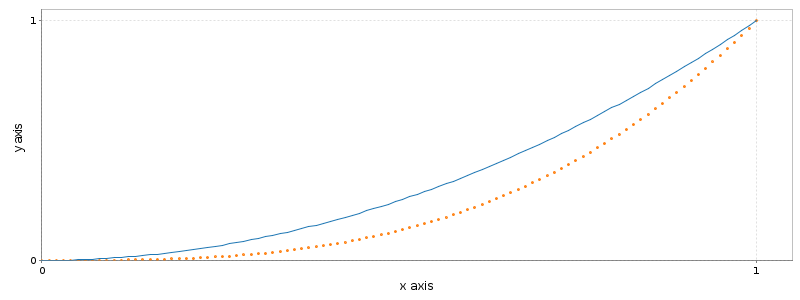

In [23]:
inlineplot(P,(300,800))